In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [3]:
match_talent = pd.read_csv("match_talent.csv")
feature, target = match_talent.iloc[:, :-1], match_talent.iloc[:, -1]

In [4]:
def betted(data):
    if data.predicted == 0:
        return data.avg_h_bet
    elif data.predicted == 1:
        return data.avg_d_bet
    else:
        return data.avg_a_bet

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
accuracy_time_avg_bet = []
accuracy_time_avg_bet2 = []
train_x, test_x, train_y, test_y = train_test_split(feature, target, test_size=0.1, shuffle=True)
randomforest =  RandomForestClassifier(max_depth=10, n_estimators=100).fit(train_x, train_y)
predicted = randomforest.predict(test_x)
prob = randomforest.predict_proba(test_x)
test_x['predicted'] = predicted
test_x['h_prob'] = prob[:, 0]
test_x['d_prob'] = prob[:, 1]
test_x['a_prob'] = prob[:, 2]
test_x['actual'] = test_y
test_x['bet'] = test_x.apply(betted, axis=1)
for p in range(0, 10, 1):
    proba = p / 10
    match_bet1 = test_x[(test_x.h_prob > proba) | \
        (test_x.d_prob > proba) | \
        (test_x.a_prob > proba) ]
    accuracy1 = accuracy_score(match_bet1['predicted'], match_bet1['actual'])
    avg_bet1 = np.mean(match_bet1['bet'])
    accuracy_time_avg_bet.append((accuracy1 * avg_bet1 - 1))
    
    match_bet2 = test_x[\
        (test_x.predicted == 0) & \
        (test_x.avg_h_bet < test_x.avg_d_bet) & \
        (test_x.avg_h_bet < test_x.avg_a_bet) &
        (test_x.h_prob > proba) | \
        (test_x.predicted == 1) & \
        (test_x.avg_d_bet < test_x.avg_h_bet) & \
        (test_x.avg_d_bet < test_x.avg_a_bet) &
        (test_x.d_prob > proba) | \
        (test_x.predicted == 2) & \
        (test_x.avg_a_bet < test_x.avg_d_bet) & \
        (test_x.avg_a_bet < test_x.avg_h_bet) &  \
        (test_x.a_prob > proba) ]
    accuracy2 = accuracy_score(match_bet2['predicted'], match_bet2['actual'])
    avg_bet2 = np.mean(match_bet2['bet'])
    accuracy_time_avg_bet2.append((accuracy2 * avg_bet2 - 1))

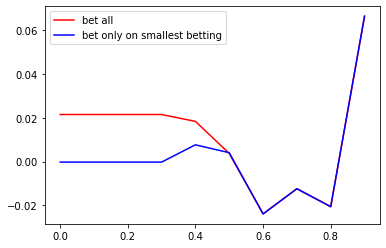

In [36]:
fig, ax = plt.subplots()
x = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
ax.plot(x, accuracy_time_avg_bet, color='r', label='bet all')
ax.plot(x, accuracy_time_avg_bet2, color='b', label='bet only on smallest betting')
plt.legend()
plt.show()
fig.savefig("select_talent_bet.png")

In [9]:
def money(data):
    if data.predicted == 0: # and data.avg_h_bet * data.h_prob > 1.2:
        if data.actual == 0:
            return (data.avg_h_bet-1)#  * (data.h_prob ** 40)
        else:
            return -1#  * (data.h_prob ** 40)
    elif data.predicted == 1: # and data.avg_d_bet * data.d_prob > 1.2:
        if data.actual == 1:
            return (data.avg_d_bet - 1)#  * (data.h_prob ** 40)
        else:
            return -1#  * (data.h_prob ** 40)
    elif data.predicted == 2: # and data.avg_a_bet * data.a_prob > 1.2:
        if data.actual == 2:
            return (data.avg_a_bet - 1)#  * (data.h_prob ** 40)
        else:
            return -1#  * (data.h_prob ** 40)
    else:
        return 0

In [38]:
returns = []
for i in range(100):  
    train_x, test_x, train_y, test_y = train_test_split(feature, target, test_size=0.1, shuffle=True)
    randomforest =  RandomForestClassifier(max_depth=10, n_estimators=100).fit(train_x, train_y)
    predicted = randomforest.predict(test_x)
    prob = randomforest.predict_proba(test_x)
    test_x['predicted'] = predicted
    test_x['h_prob'] = prob[:, 0]
    test_x['d_prob'] = prob[:, 1]
    test_x['a_prob'] = prob[:, 2]
    score = accuracy_score(test_x['predicted'], test_y)
    print(score)
    test_x['actual'] = test_y
    
    
    match_bet2 = test_x[\
          (test_x.predicted == 0) & \
          # (test_x.avg_h_bet < test_x.avg_d_bet) & \
          # (test_x.avg_h_bet < test_x.avg_a_bet) &
          (test_x.h_prob > 0.9) | \
          (test_x.predicted == 1) & \
          # (test_x.avg_d_bet < test_x.avg_h_bet) & \
          # (test_x.avg_d_bet < test_x.avg_a_bet) &
          (test_x.d_prob > 0.9) | \
          (test_x.predicted == 2) & \
          # (test_x.avg_a_bet < test_x.avg_d_bet) & \
          # (test_x.avg_a_bet < test_x.avg_h_bet) &  \
          (test_x.a_prob > 0.9) ]
    money_win = match_bet2.apply(money, axis=1)
    accuracy = accuracy_score(match_bet2['predicted'], match_bet2['actual'])
    match_bet2['bet'] = match_bet2.apply(betted, axis=1)
    print(np.mean(match_bet2['bet']) * accuracy)
    print()
    return_rate = np.sum(money_win)
    returns.append(return_rate)
returns = np.array(returns)
print()
print(returns.mean())
print(returns.var())
print(np.sum(returns > 0))
print(returns)

0.5517766497461929
1.0856246531906462

0.5431472081218274
1.1245755772005772

0.5401015228426396
1.1050655319359795

0.5375634517766498
1.0191656368429725

0.533502538071066
0.9515623333333334

0.5081218274111675
1.130329365079365

0.534517766497462
1.1245664682539682

0.5279187817258884
1.0449761192095883

0.5213197969543147
1.086845231205908

0.5314720812182742
1.054383667393423

0.5461928934010152
1.0346441326530613

0.5263959390862945
1.0354058741143513

0.5304568527918782
1.0261130677761303

0.5203045685279187
1.082198704761905

0.5487309644670051
1.0065849269841272

0.5274111675126903
1.0830672766019989

0.5350253807106599
1.0494792982669257

0.5279187817258884
1.0643889508928572

0.5446700507614213
1.0558660016741068

0.5492385786802031
1.0527957171034092

0.5431472081218274
0.9689549393602889

0.5309644670050762
1.1229436728395064

0.5477157360406092
1.0620769155398788

0.5274111675126903
1.0805575947971782

0.5289340101522843
1.011774446520582

0.5390862944162437
1.07258804859